Grade=100/100
Sidenote: You can change the individual box from code to markdown to write text.

In [1]:
"""Introduction:
The purpose of this lab was to understand the calibration for the ccd in the Angel Hall telescope.
We were trying to find the gain, readnoise, linearity, and dark current of the ccd, which are imperative
to our understanding of astronomy.

Theory:
Bias frames tell us the noise of our ccd, which allows us to find the readnoise and gain
when used along with the flat frames. Flat frames are exposures with a constant amount of light across the ccd.
Linearity tells us when the ccd is saturated with light by telling us when the counts per second stops being linear.
Dark current gives us the amount of radiation that makes in into the telescope when there is no light
entering the telescope.

Methodology:
For the gain and read noise we took bias and flat frames in order to calculate the variances necessary
to calculate the gain and readnoise. For linearity, we took flat frames at different exposure times
in order to find out when our ccd is saturated. For dark current, we took dark frames at different temperatures
to plot the dark current and fit a curve."""

'Introduction:\nThe purpose of this lab was to understand the calibration for the ccd in the Angel Hall telescope.\nWe were trying to find the gain, readnoise, linearity, and dark current of the ccd, which are imperative\nto our understanding of astronomy.\n\nTheory:\nBias frames tell us the noise of our ccd, which allows us to find the readnoise and gain\nwhen used along with the flat frames. Flat frames are exposures with a constant amount of light across the ccd.\nLinearity tells us when the ccd is saturated with light by telling us when the counts per second stops being linear.\nDark current gives us the amount of radiation that makes in into the telescope when there is no light\nentering the telescope.\n\nMethodology:\nFor the gain and read noise we took bias and flat frames in order to calculate the variances necessary\nto calculate the gain and readnoise. For linearity, we took flat frames at different exposure times\nin order to find out when our ccd is saturated. For dark curr

In [3]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

root = '/Users/catclark/calibration/ccd/'

bias1 = fits.open(root + 'bias1.fit')
bias1.info()
biasdata1 = bias1[0].data

bias2 = fits.open(root + 'bias2.fit')
bias2.info()
biasdata2 = bias2[0].data

biasdata3 = biasdata1 - biasdata2
biasdata3 = biasdata3**2

biasvar = np.mean(biasdata3)
biasrms = np.sqrt(biasvar)

flat1 = fits.open(root + 'flat1.fit')
flat1.info()
flatdata1 = flat1[0].data

flat2 = fits.open(root + 'flat2.fit')
flat2.info()
flatdata2 = flat2[0].data

flatdata3 = flatdata1 - flatdata2
flatdata3 = flatdata3**2

flatvar = np.mean(flatdata3)

biasmean1 = np.mean(biasdata1)
biasmean2 = np.mean(biasdata2)
flatmean1 = np.mean(flatdata1)
flatmean2 = np.mean(flatdata2)

gain = ((flatmean1 + flatmean2) - (biasmean1 + biasmean2))/(flatvar - biasvar)

print gain

readnoise = gain * (biasrms) / np.sqrt(2)

print readnoise

Filename: /Users/catclark/calibration/ccd/bias1.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      40   (1530, 1020)   int16 (rescales to uint16)   
Filename: /Users/catclark/calibration/ccd/bias2.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      40   (1530, 1020)   int16 (rescales to uint16)   
Filename: /Users/catclark/calibration/ccd/flat1.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      40   (1530, 1020)   int16 (rescales to uint16)   
Filename: /Users/catclark/calibration/ccd/flat2.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      40   (1530, 1020)   int16 (rescales to uint16)   
2.49013847566
15.5406834827


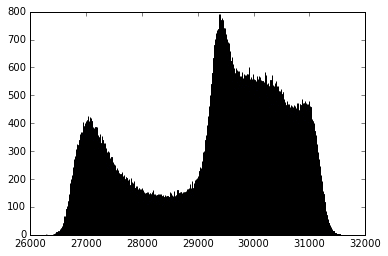

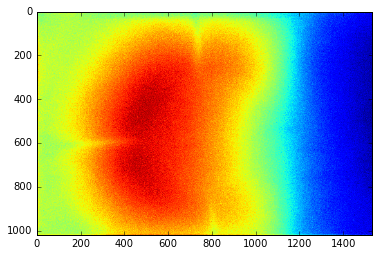

In [6]:
#flat one histogram

flatdata1_hist = []
for a in flatdata1:
    for b in a:
        flatdata1_hist.append(b)

plt.hist(flatdata1_hist, bins = range(min(flatdata1_hist), max(flatdata1_hist) + 1, 1))
plt.xlim(26000,32000)
plt.show()

plt.imshow(flatdata1, vmin = 26500, vmax = 31500)
plt.show()

#The pixel count varies throughout the image, so the mean value is not a helpful measurement.

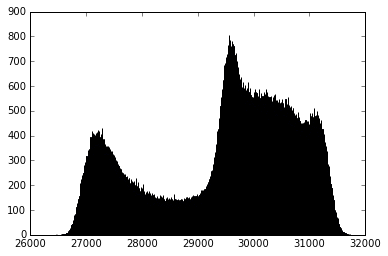

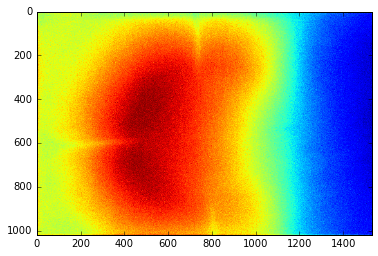

In [8]:
#flat two histogram

flatdata2_hist = []
for a in flatdata2:
    for b in a:
        flatdata2_hist.append(b)

plt.hist(flatdata2_hist, bins = range(min(flatdata2_hist), max(flatdata2_hist) + 1, 1))
plt.xlim(26000,32000)
plt.show()

plt.imshow(flatdata2, vmin = 26500, vmax = 31500)
plt.show()

[1.0, 15.0, 30.0, 20.0, 10.0]
[5788.7790554914773, 59465.67092079969, 60008.54247084455, 59929.48298795335, 47506.499956427018]


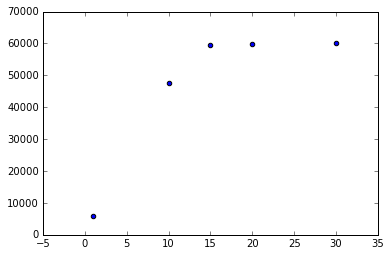

In [12]:
linearityfiles = [root + 'lin1.fit',\
                  root + 'lin2.fit',\
                  root + 'lin3.fit',\
                  root + 'lin4.fit',\
                  root + 'lin5.fit']

exptimes = []
linmeans = []

for files in linearityfiles:
    lin = fits.open(files)
    lin.info
    linheader = lin[0].header
    lindata = lin[0].data
    exptimes.append(linheader['EXPTIME'])
    linmeans.append(np.mean(lindata))
    
print exptimes
print linmeans

plt.figure()
plt.scatter(exptimes, linmeans)
plt.show()

#The ccd begins to differ from linearity at 15 seconds.

[ 277.1735177   280.23387797  282.47590879  284.7757721   286.66485128
  288.1146225   289.59607829  291.11266805  292.14512777  292.6682382
  293.7290506   294.26710568]
[ 1025.60469179  1025.3488844   1025.99379149  1027.20717929  1029.3985198
  1032.28542227  1035.28459375  1040.37767013  1043.89754389  1047.12078367
  1051.0810041   1054.59959823]
a=1.35953407351e+27, b=-39787.5743021


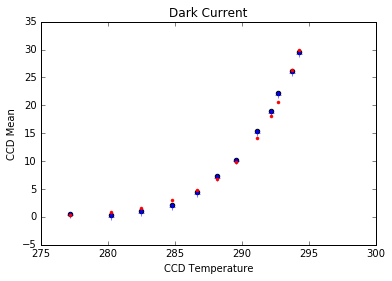

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

temps = []
means = []

darkcurrentfiles = [root + 'dark5.fit',\
            root + 'dark6.fit',\
            root + 'dark7.fit',\
            root + 'dark8.fit',\
            root + 'dark9.fit',\
            root + 'dark10.fit',\
            root + 'dark11.fit',\
            root + 'dark12.fit',\
            root + 'dark13.fit',\
            root + 'dark14.fit',\
            root + 'dark15.fit',\
            root + 'dark16.fit']

for files in darkcurrentfiles:
    dark = fits.open(files)
    dark.info
    darkheader = dark[0].header
    darkdata = dark[0].data
    temps.append(darkheader['CCD-TEMP'] + 273.15)
    means.append(np.mean(darkdata))
 
temps = np.array(temps)
means = np.array(means)
means += 3
print temps
print means

plt.figure()
plt.scatter(temps, (means-1025))
plt.xlabel('CCD Temperature')
plt.ylabel('CCD Mean')
plt.title('Dark Current')

def func(t, a, E):
        return a*np.power(t,(3.0/2.0))*np.exp((E)/(2*t))
a0, E0 = (1., 20.)

at, Et = (30,-6000)
#plt.plot(temps,(np.array(means) - min(means)), '+')
#plt.plot(temps,func(temps,at,Et), 'g.')
#print ("a=%s, b=%s" % (at,Et))

coeffs, fiterr = curve_fit(func, temps, (np.array(means) - min(means)), p0=(at,Et), maxfev=10000)

print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.plot(temps,(np.array(means) - min(means)), '+')
plt.plot(temps,func(temps,*coeffs),'r.')
plt.show()

In [ ]:
"""Conclusion: When comparing our CCD data to the MDM4K detector, we find that the gain is very similar
that the readnoise is a bit less, and thatthe linearity lasts till about 50000 ADUS,
similar to the MDM4K."""